In [1]:
chr(0)

'\x00'

In [2]:
print(chr(0))

 


In [3]:
print(chr(0).__repr__())

'\x00'


In [4]:
test_string = "this is a test" + chr(0) + "string"

In [5]:
print(test_string)

this is a test string


In [1]:
test_string = "hello! こんにちは!"
utf8_encoded = test_string.encode("utf-8")

In [7]:
print(utf8_encoded)
print(list(utf8_encoded))

b'hello! \xe3\x81\x93\xe3\x82\x93\xe3\x81\xab\xe3\x81\xa1\xe3\x81\xaf!'
[104, 101, 108, 108, 111, 33, 32, 227, 129, 147, 227, 130, 147, 227, 129, 171, 227, 129, 161, 227, 129, 175, 33]


In [8]:
len(test_string), len(utf8_encoded)

(13, 23)

In [9]:
utf8_encoded.decode("utf-8")

'hello! こんにちは!'

In [10]:
utf16_encoded = test_string.encode("utf-16")
utf32_encoded = test_string.encode("utf-32")

In [11]:
print (len(list(utf8_encoded)))
print (len(list(utf16_encoded)))
print (len(list(utf32_encoded)))

23
28
56


In [12]:
test_string = "hello"
print(len(test_string))
print(len(list(test_string.encode("utf-8"))))

5
5


In [13]:
def decode_utf8_bytes_to_str_wrong(bytestring: bytes):
	return "".join([bytes([b]).decode("utf-8") for b in bytestring])

In [14]:
decode_utf8_bytes_to_str_wrong("hello".encode("utf-8"))

'hello'

In [18]:
list("hello".encode("utf-8"))

[104, 101, 108, 108, 111]

In [ ]:
# decode_utf8_bytes_to_str_wrong("hello! こんにちは!".encode("utf-8")) # Error

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 0: unexpected end of data

In [16]:
bytes(list("こ".encode("utf-8"))[:-1]).decode("utf-8") # Error - probably no byte sequence can be prefix of any other?

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 0-1: unexpected end of data

In [54]:
PAT = r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+"""

In [46]:
import regex as re

In [47]:
re.findall(PAT, "some text that i'll pre-tokenize")

['some', ' text', ' that', ' i', "'ll", ' pre', '-', 'tokenize']

In [48]:
re.findall(PAT, "this is a piece of random text")

['this', ' is', ' a', ' piece', ' of', ' random', ' text']

In [49]:
re.findall(PAT, "this is a piece of random text.")

['this', ' is', ' a', ' piece', ' of', ' random', ' text', '.']

In [ ]:
corpus = []
with open('tiny_corpus.txt', 'r') as f:
	for line in f.readlines():
		corpus.extend([word.strip() for word in line.split(' ')])

In [82]:
from collections import Counter

def bpe_tokenizer(corpus, num_merges):
	new_tokens = []

	# Create a dict mapping pretokens to frequency
	freq = Counter()

	for pretoken in corpus:
		freq[tuple(pretoken)] += 1

	# Loop through for num_merges
	for _ in range(num_merges):

		# Count the number of co-orccurences
		bigrams = Counter()

		for pretoken in freq.keys():
			for char_1, char_2 in zip(pretoken[:-1], pretoken[1:]):
				bigrams[(char_1, char_2)] += freq[pretoken]

		# Get the max one resolving ties lexicographically
		max_val = max(bigrams.values())
		max_bigrams = [bigram for bigram in bigrams if bigrams[bigram] == max_val ]

		# Append to new_tokens
		merge_rule = max(max_bigrams)
		new_tokens.append(''.join(merge_rule))

		# Create new dict mapping pretokens to frequency with merge
		new_freq = {}
		for pretoken, val in freq.items():
			i = 0
			new_pretoken = []
			while i < len(pretoken) - 1:
				char_1 = pretoken[i]
				char_2 = pretoken[i + 1]

				if char_1 == merge_rule[0] and char_2 == merge_rule[1]:
					new_pretoken.append(char_1 + char_2)
					i += 2
				else:
					new_pretoken.append(char_1)
					i += 1

			if i == len(pretoken) - 1:
				new_pretoken.append(pretoken[i])
			new_freq[tuple(new_pretoken)] = val
		
		# Replace existing mapping
		freq = new_freq
	return new_tokens

In [ ]:
bpe_tokenizer(corpus, 6)

# Making an assumption here that each character is mapping to 1 byte

['st', 'est', 'ow', 'low', 'west', 'ne']

In [1]:
with open('data/TinyStoriesV2-GPT4-train.txt', 'r') as f:
	lines = f.readlines()

In [2]:
len(lines[0])

1

#### GRAVEYARD

In [33]:
from cs336_basics.pretokenization_example import find_chunk_boundaries
f = open('data/TinyStoriesV2-GPT4-train.txt', 'rb')
desired_num_chunks = 100
split_special_token = b'<|endoftext|>'
chunk_boundaries = find_chunk_boundaries(f, desired_num_chunks, split_special_token)

In [34]:
i = 0
f.seek(chunk_boundaries[i])
op = f.read(chunk_boundaries[i + 1] - chunk_boundaries[i])

In [5]:
op_str = op.decode('utf-8')

In [6]:
print(op_str[-2000:])

d her mom went to the store and picked out the most beautiful kite they could find. It was red, blue, and yellow. Lily was so grateful to her mom for helping her get the kite. They went to the park to fly the kite together.
At the park, Lily and her mom ran and laughed as they flew the kite high in the sky. The kite danced in the wind, and Lily's dream had come true. She was so grateful for her mom and the fun day they had together.
From that day on, Lily and her mom flew the kite at the park whenever they could. They had so much fun together, and Lily knew that dreams can come true. She was very grateful for her mom and her pretty, colorful kite.
<|endoftext|>
Once upon a time, there was a pretty landscape with many trees. It was a happy place. One day, a big wind came and blew very hard. It made the trees bend and shake. The animals in the landscape were scared.
A little bird had a nest in one of the trees. The bird's nest started to hang on a branch, about to fall. The little bird w

In [7]:
print(op_str[:1000])


Once upon a time there was a little boy named Ben. Ben loved to explore the world around him. He saw many amazing things, like beautiful vases that were on display in a store. One day, Ben was walking through the store when he came across a very special vase. When Ben saw it he was amazed!  
He said, “Wow, that is a really amazing vase! Can I buy it?” 
The shopkeeper smiled and said, “Of course you can. You can take it home and show all your friends how amazing it is!”
So Ben took the vase home and he was so proud of it! He called his friends over and showed them the amazing vase. All his friends thought the vase was beautiful and couldn't believe how lucky Ben was. 
And that's how Ben found an amazing vase in the store!
<|endoftext|>
Once upon a time, there was a reliable otter named Ollie. He lived in a river with his family. They all loved to play and swim together.
One day, Ollie's mom said, "Ollie, hurry and get some fish for dinner!" Ollie swam fast to catch fish. He saw his fri

In [9]:
split_special_token.decode('utf-8')

'<|endoftext|>'

In [45]:
import regex as re
import multiprocessing as mp
from collections import Counter
from cs336_basics.pretokenization_example import find_chunk_boundaries

file = open('data/TinyStoriesV2-GPT4-train.txt', 'rb')
desired_num_chunks = 100
split_special_token = b'<|endoftext|>'
special_tokens = [split_special_token]

chunk_boundaries = find_chunk_boundaries(file, desired_num_chunks, split_special_token)
chunks = []

for idx in range(len(chunk_boundaries) - 1):
	file.seek(chunk_boundaries[idx])
	chunks.append(file.read(chunk_boundaries[idx + 1] - chunk_boundaries[idx]))

PAT = r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+"""

def process_each_chunk(chunk: bytes, special_tokens: list[bytes])-> Counter:
	# Remove special tokens
	pattern = b'|'.join(re.escape(tok) for tok in special_tokens)
	chunk_no_special_tokens = b" ".join(re.split(pattern, chunk))
	counter = Counter()

	for pretoken in re.finditer(PAT, chunk_no_special_tokens.decode("utf-8")):
		pretoken = pretoken.group()
		pretoken = tuple(pretoken.encode("utf-8"))
		counter[tuple(pretoken)] += 1

	return counter

In [46]:
# Run above function on each chunk
with mp.Pool() as pool:
	local_counters = pool.starmap(
		process_each_chunk,
		[(chunk, special_tokens) for chunk in chunks[:20]]
	)

# Merge all local counters
final_counter = Counter()
for counter in local_counters:
	final_counter.update(counter)

### Inspecting tokenizer outputs from TS and OWT

##### Stats on dataset

In [9]:
def count_stories(file_path):
	delimiter = "<|endoftext|>"

	with open(file_path, 'r', encoding='utf-8') as f:
		file_content = f.read()

	return file_content.count(delimiter)

filepath = "/home/siddhesh/code/assignment1-basics/data/TinyStoriesV2-GPT4-train.txt"
print(count_stories(filepath))

2717699


In [ ]:
def count_stories_memory_efficient(file_path, delimiter="<|endoftext|>", chunk_size=4096):
    count = 0
    remainder = ""
    delimiter_len = len(delimiter)
    
    with open(file_path, 'rb') as f:
        while True:
            chunk = f.read(chunk_size)
            if not chunk:
                break
            
            text_chunk = chunk.decode('utf-8', errors='ignore')

            current_block = remainder + text_chunk
            
            count += current_block.count(delimiter)
            
            remainder = current_block[-(delimiter_len - 1):]
            
    return count
filepath = "/home/siddhesh/code/assignment1-basics/data/owt_train.txt"
print(count_stories_memory_efficient(filepath)) # This answer is wrong should be 8M docs

2399397


##### Tokenizer

In [1]:
import pickle

with open("/home/siddhesh/code/assignment1-basics/data/TinyStoriesV2-GPT4-train.pkl", 'rb') as f:
	ts_tokenizer = pickle.load(f)

with open("/home/siddhesh/code/assignment1-basics/data/owt_train.pkl", 'rb') as f:
	owt_tokenizer = pickle.load(f)

In [2]:
ts_tokenizer['merges'][:20]

[(b' ', b't'),
 (b'h', b'e'),
 (b' ', b'a'),
 (b' ', b's'),
 (b' ', b'w'),
 (b'n', b'd'),
 (b' t', b'he'),
 (b'e', b'd'),
 (b' ', b'b'),
 (b' t', b'o'),
 (b' a', b'nd'),
 (b' ', b'h'),
 (b' ', b'f'),
 (b'i', b'n'),
 (b' ', b'T'),
 (b' w', b'a'),
 (b'r', b'e'),
 (b'i', b't'),
 (b'o', b'u'),
 (b' ', b'l')]

In [3]:
owt_tokenizer['merges'][:20]

[(b' ', b't'),
 (b' ', b'a'),
 (b'h', b'e'),
 (b'i', b'n'),
 (b'r', b'e'),
 (b' t', b'he'),
 (b'o', b'n'),
 (b'e', b'r'),
 (b' ', b's'),
 (b' ', b'w'),
 (b'a', b't'),
 (b' ', b'o'),
 (b'e', b'n'),
 (b' ', b'c'),
 (b'i', b't'),
 (b'i', b's'),
 (b'a', b'n'),
 (b'o', b'r'),
 (b' ', b'b'),
 (b'e', b's')]

### Check for common merges

In [4]:
num_common = 0

owt_tokenizer_merges_set = set(owt_tokenizer['merges'])

for merge in ts_tokenizer['merges']:
	if merge in owt_tokenizer_merges_set:
		num_common += 1

print (f"Num common merges: {num_common} / {len(ts_tokenizer['merges'])}")
print (f"% common merges: {num_common / len(ts_tokenizer['merges'])}")

Num common merges: 5178 / 9743
% common merges: 0.5314584830134456


In [ ]:
%matplotlib inline

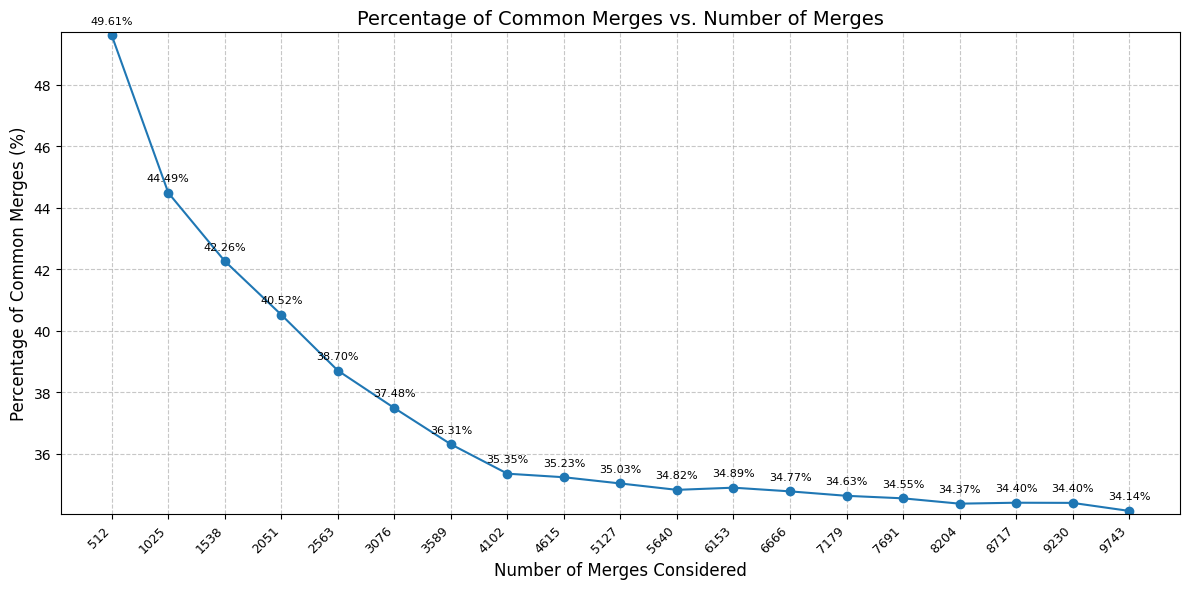

In [15]:
import collections
from typing import List, Tuple, Dict, Any
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Merge = Tuple[bytes, bytes]

def analyze_common_merges(
    ts_merges: List[Merge],
    owt_merges: List[Merge],
    num_points: int = 20
) -> List[Dict[str, Any]]:
    max_merges = min(len(ts_merges), len(owt_merges))

    if max_merges == 0:
        return []

    indices = sorted(list(
        set(
            [int(i * max_merges / (num_points - 1)) for i in range(num_points)]
        )
    ))

    indices = [i for i in indices if i > 0 and i <= max_merges]

    ts_set = set()
    owt_set = set()
    results = []

    for i in range(1, max_merges + 1):
        ts_set.add(ts_merges[i - 1])
        owt_set.add(owt_merges[i - 1])

        if i in indices:
            common_merges = ts_set.intersection(owt_set)
            common_percent = (len(common_merges) / i) * 100

            results.append({
                'num_merges': i,
                'common_percent': common_percent
            })

    return results

plot_data = analyze_common_merges(
    ts_merges=ts_tokenizer['merges'],
    owt_merges=owt_tokenizer['merges'],
    num_points=20
)

# Separate the data into X and Y lists
num_merges = [d['num_merges'] for d in plot_data]
common_percent = [d['common_percent'] for d in plot_data]

# Find the minimum and maximum percentage values
min_percent = min(common_percent)
max_percent = max(common_percent) # This is 100.0

# Set Y-Axis Limits Dynamically
# Set Y_max to be max_percent + 0.1% for breathing room
y_max_limit = max_percent + 0.1 
# Set Y_min to be min_percent - 0.1% for breathing room
y_min_limit = min_percent - 0.1

# Use the OO interface for better control, and increase width for labels
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(num_merges, common_percent, marker='o', linestyle='-', color='tab:blue', zorder=2)

# --- Code to add label for every plotted point on the Y-axis ---
# A small offset is used to push the label above the marker
y_text_offset = (y_max_limit - y_min_limit) * 0.02 

for x, y in zip(num_merges, common_percent):
    # Format the text to two decimal places and append the percent sign
    label = f"{y:.2f}%"
    
    # Add the text label to the plot
    ax.text(x, y + y_text_offset, label, ha='center', va='bottom', fontsize=8, color='black', zorder=3)
# -------------------------------------------------------------

# Apply the dynamic Y-axis limits
ax.set_ylim(y_min_limit, y_max_limit)

# --- Set X-Axis Ticks and Labels for Every Point ---
# 1. Set the tick locations to match the num_merges list
ax.set_xticks(num_merges)

# 2. Set the tick labels (using the same list) and rotate them 45 degrees
ax.set_xticklabels(num_merges, rotation=45, ha='right', fontsize=9)
# --------------------------------------------------

# Add title and labels
ax.set_title('Percentage of Common Merges vs. Number of Merges', fontsize=14)
ax.set_xlabel('Number of Merges Considered', fontsize=12)
ax.set_ylabel('Percentage of Common Merges (%)', fontsize=12)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7, zorder=1)

# Adjust layout to prevent rotated labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

### What is average number of bytes per token? Higher the better

In [4]:
def calculate_average_bytes(vocab: dict):
	num_bytes = 0
	for _, val in vocab.items():
		num_bytes += len(val)

	return num_bytes / len(vocab)

In [6]:
calculate_average_bytes(ts_tokenizer['vocab']), calculate_average_bytes(owt_tokenizer['vocab'])

(5.7906, 6.33721875)

#### How does the pretokenization pattern apply to special tokens

In [1]:
PAT = r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+"""

In [2]:
import regex as re

In [6]:
with open('/home/siddhesh/code/assignment1-basics/data/TinyStoriesV2-GPT4-train.txt') as f:
	ts = f.read()

In [4]:
op = re.findall(PAT, ts[:1000])

In [7]:
print (ts[:1000])


Once upon a time there was a little boy named Ben. Ben loved to explore the world around him. He saw many amazing things, like beautiful vases that were on display in a store. One day, Ben was walking through the store when he came across a very special vase. When Ben saw it he was amazed!  
He said, “Wow, that is a really amazing vase! Can I buy it?” 
The shopkeeper smiled and said, “Of course you can. You can take it home and show all your friends how amazing it is!”
So Ben took the vase home and he was so proud of it! He called his friends over and showed them the amazing vase. All his friends thought the vase was beautiful and couldn't believe how lucky Ben was. 
And that's how Ben found an amazing vase in the store!
<|endoftext|>
Once upon a time, there was a reliable otter named Ollie. He lived in a river with his family. They all loved to play and swim together.
One day, Ollie's mom said, "Ollie, hurry and get some fish for dinner!" Ollie swam fast to catch fish. He saw his fri

In [6]:
#op #Uncomment to print

In [7]:
special_token = "<|endoftext|>"

In [14]:
import re
matches = re.finditer(re.escape(special_token), ts[:1000])

In [15]:
match = next(matches)

In [24]:
match.group()

'<|endoftext|>'

In [18]:
ts[match.span()[0]:match.span()[1]]

'<|endoftext|>'

In [10]:
ts[732:750]

'<|endoftext|>\nOnce'

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from cs336_basics.tokenizer import Tokenizer

In [42]:
tokenizer = Tokenizer.from_files("data/TinyStoriesV2-GPT4-train.pkl", "", ["<|endoftext|>"])

In [43]:
tokenized_seq = tokenizer.encode(ts[:1000])

KeyError: 745

In [41]:
print(tokenizer.decode(tokenized_seq))


Once upon a time there was a little boy named Ben. Ben loved to explore the world around him. He saw many amazing things, like beautiful vases that were on display in a store. One day, Ben was walking through the store when he came across a very special vase. When Ben saw it he was amazed!  
He said, “Wow, that is a really amazing vase! Can I buy it?” 
The shopkeeper smiled and said, “Of course you can. You can take it home and show all your friends how amazing it is!”
So Ben took the vase home and he was so proud of it! He called his friends over and showed them the amazing vase. All his friends thought the vase was beautiful and couldn't believe how lucky Ben was. 
And that's how Ben found an amazing vase in the store!

Once upon a time, there was a reliable otter named Ollie. He lived in a river with his family. They all loved to play and swim together.
One day, Ollie's mom said, "Ollie, hurry and get some fish for dinner!" Ollie swam fast to catch fish. He saw his fri


In [44]:
import pickle

with open("data/TinyStoriesV2-GPT4-train.pkl", "rb") as f:
	vocab = pickle.load(f)

In [49]:
type(vocab['vocab'])

dict

In [ ]:
import json
def convert_bytes_to_str(obj):
    # This function iterates through the dictionary and replaces bytes objects
    if isinstance(obj, dict):
        return {k: convert_bytes_to_str(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_bytes_to_str(element) for element in obj]
    elif isinstance(obj, bytes):
        # Decode the bytes to a string, assuming UTF-8
        return obj.decode('utf-8', errors="replace")
    else:
        return obj

with open("data/TinyStoriesV2-GPT4-train_vocab.json", "w") as f:
	json.dump(convert_bytes_to_str(vocab['vocab']), f)

In [60]:
from typing import List, Tuple
def write_tuples_to_text(data_list: List[Tuple[bytes, bytes]], file_path: str) -> None:
    """
    Writes a list of 2-element byte string tuples to a text file.

    Each byte string in a tuple is decoded (using 'utf-8') and written 
    to a single line, separated by a space. Each tuple starts a new line.

    Args:
        data_list: The list of tuples, where each tuple contains two bytes strings.
        file_path: The path to the output text file.
    """
    try:
        # Open the file in write mode ('w'). It will automatically be closed.
        with open(file_path, 'w', encoding='utf-8') as f:
            for b1, b2 in data_list:
                # Decode the bytes strings to regular strings
                s1 = b1.decode('utf-8', errors="replace")
                s2 = b2.decode('utf-8', errors="replace")

                # Write the two strings separated by a space, followed by a newline
                f.write(f"{s1} {s2}\n")
        print(f"Successfully wrote {len(data_list)} lines to {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [62]:
write_tuples_to_text(vocab['merges'], 'data/TinyStoriesV2-GPT4-train_merges.txt')

Successfully wrote 9743 lines to data/TinyStoriesV2-GPT4-train_merges.txt
